# Testing the Musical MDN Code

- Setup the system.

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import random
import numpy as np
import tensorflow as tf
import musical_mdn
import matplotlib.pyplot as plt
import pandas as pd

musical_mdn.MODEL_DIR = "/Users/charles/src/mdn-experiments/"
print(musical_mdn.MODEL_DIR)

/Users/charles/src/mdn-experiments/


## Training Test

In [ ]:
x_t_log = musical_mdn.generate_data()
loader = musical_mdn.SequenceDataLoader(num_steps = 121,batch_size = 100, corpus = x_t_log)
net = musical_mdn.TinyJamNet2D(mode = musical_mdn.NET_MODE_TRAIN, n_hidden_units = 128, n_mixtures = 10, batch_size = 100, sequence_length = 120)
losses = net.train(loader, 30, saving=True)
## Plot the losses.
plt.plot(losses)
plt.show()

## Evaluation Test

Predict 10000 Datapoints and plot some segments.

In [2]:
## Evaluation Test:
## Predict 10000 Datapoints.
net = musical_mdn.TinyJamNet2D(mode = musical_mdn.NET_MODE_RUN, n_hidden_units = 128, n_mixtures = 10, batch_size = 1, sequence_length = 1)

INFO:tensorflow:Loading Running Operations
INFO:tensorflow:done initialising: tiny-perf-mdn-1layers-128units vars: 73522


Test Input: [ 0.00765566  6.6025675 ]
INFO:tensorflow:Restoring parameters from /Users/charles/src/mdn-experiments/tiny-perf-mdn-1layers-128units
Test Output:


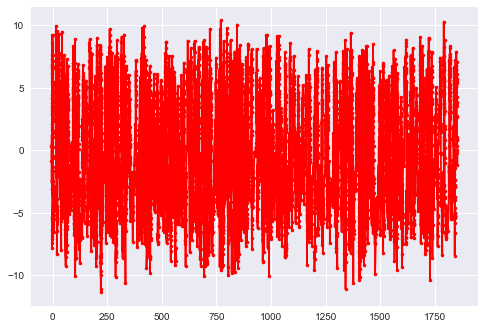

                  t             x          time
count  10001.000000  10001.000000  10001.000000
mean       0.185287      0.173400    886.446588
std        0.846127      4.159941    524.631232
min       -2.354311    -11.369097     -5.397423
25%        0.058240     -3.198108    443.745186
50%        0.097839      0.270638    841.412003
75%        0.128028      3.594383   1365.089345
max        4.336950     10.392145   1853.058808
Window: 1000 to 1100


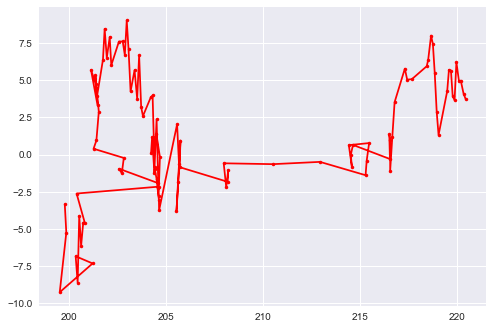

Window: 2000 to 2100


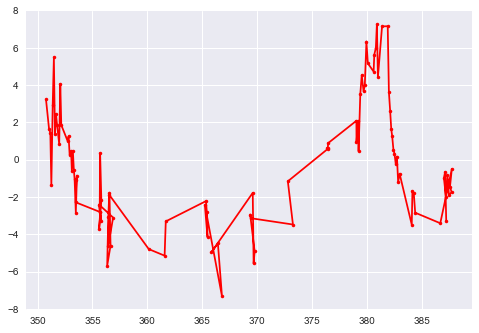

Window: 3000 to 3100


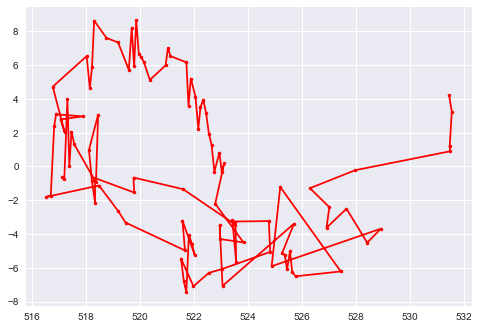

Window: 4000 to 4100


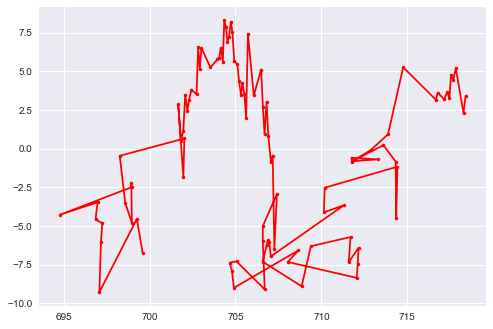

Window: 5000 to 5100


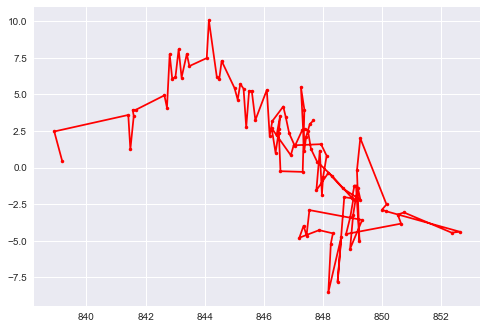

Window: 6000 to 6100


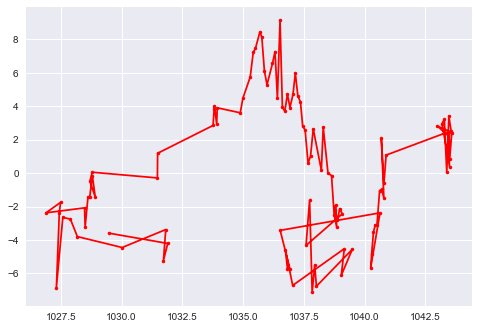

In [4]:
first_touch = np.array([(0.01 + (np.random.rand()-0.5)*0.005), (np.random.rand()-0.5)*20])
print("Test Input:",first_touch)
with tf.Session() as sess:
    perf = net.generate_performance(first_touch,10000,sess)
print("Test Output:")
perf_df = pd.DataFrame({'t':perf.T[0], 'x':perf.T[1]})
perf_df['time'] = perf_df.t.cumsum()
#plt.show(perf_df.plot('time','x',kind='scatter'))
plt.plot(perf_df.time, perf_df.x, '.r-')
plt.show()
print(perf_df.describe())
## Investigate Output
window = 100
for n in [1000,2000,3000,4000,5000,6000]:
    print("Window:", str(n),'to',str(n+window))
    plt.plot(perf_df[n:n+window].time, perf_df[n:n+window].x, '.r-')
    plt.show()